In [1]:
#Bibliotecas necessárias

#Bibliotecas para criar e treinar o modelo
import pandas as pd #manipulação dos dados
from sklearn.model_selection import train_test_split #Montar dados para teste do modelo
from sklearn.tree import DecisionTreeClassifier #Criar árvore de decisão do modelo
from sklearn.metrics import accuracy_score, confusion_matrix #Acurácia do model
from sklearn.model_selection import cross_val_score #Validar resultados por validação cruzada

#Bibliotecas para entender a árvore de decisão e resultados
from sklearn.tree import export_graphviz # Export da árvore de decisão
import graphviz #Montar árvore de decisão
import matplotlib.pyplot as plt #Montar gráficos


In [2]:
#Carregando o arquivo CSV (dados)
frutas = pd.read_csv('apple_quality.csv')

In [3]:
#Removendo espaços em branco
frutas = frutas.dropna(how='any')

In [4]:
#Verificar quantidade de linhas x colunas
#Instâncias(linhas) x Categorias(colunas)
frutas.shape

(4000, 9)

In [5]:
#Definindo parâmetros para utilizar na previsão
#Usar o .values para receber os dados com array
parametros_previsores = frutas.iloc[:,1:8].values
parametros_fruta_classe = frutas.iloc[:,8].values


In [6]:
#Separar os dados para treinamento e teste
#70% dos dados para treinamento e 30% para teste
#Usar o random_state = 0 para não mudar a porcentagem de treinamento e teste
x_frutas_treinamento, x_frutas_teste, y_frutas_treinamento, y_frutas_teste = train_test_split(parametros_previsores, parametros_fruta_classe,test_size=0.3, random_state=0)

In [7]:
#Gerar o modelo com a árvore de decisão
arvore_decisao = DecisionTreeClassifier() 

In [8]:
#Treinamento do modelo
arvore_decisao.fit(x_frutas_treinamento, y_frutas_treinamento)

DecisionTreeClassifier()

In [9]:
#Gerando as previsões com os dados de teste
previsoes = arvore_decisao.predict(x_frutas_teste)

In [10]:
#Verificando a taxa de acerto
porcentagem_acerto = accuracy_score(y_frutas_teste, previsoes)
print(f"Acurácia: {porcentagem_acerto * 100:.2f}%")

Acurácia: 78.00%


In [11]:
#Verificar porcentagem de acerto por meio da validação cruzada
#Testa os dados em porções diferentes, validando eficácia e não overfitting (decorar dados)
scores = cross_val_score(arvore_decisao, parametros_previsores, parametros_fruta_classe, cv=4)

In [12]:
scores
#Porções (fold) 1,2,3,4

array([0.8  , 0.802, 0.791, 0.798])

In [13]:
#Gerando a matrix de confusão para verificar resultados
matrix_confusao = confusion_matrix(y_frutas_teste,previsoes)
matrix_confusao

array([[487, 125],
       [139, 449]], dtype=int64)

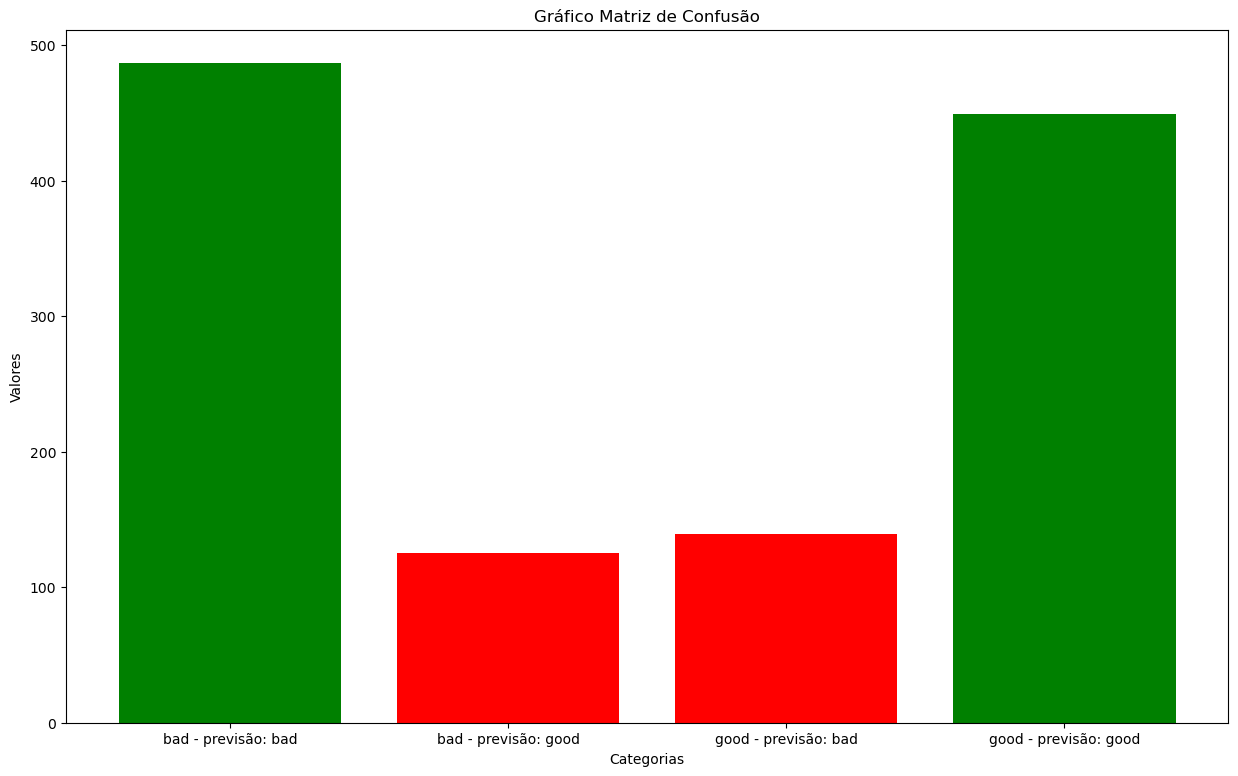

In [14]:
#Gerando gráfico para entender a matrix de confusão
categorias = ['bad - previsão: bad', 'bad - previsão: good','good - previsão: bad','good - previsão: good']
valores = [matrix_confusao[0][0], matrix_confusao[0][1],matrix_confusao[1][0],matrix_confusao[1][1]]
cores = ['green','red','red','green']
plt.figure(figsize=(15,9))
plt.bar(categorias, valores, color=cores)
plt.title('Gráfico Matriz de Confusão')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.savefig('grafico_matriz_confusao.png', dpi=600)
plt.show()



In [15]:
#Gerando árvore de decisão do Modelo
data_arvore = export_graphviz(arvore_decisao, out_file=None, filled=True, rounded=True,
                            special_characters=True, feature_names=frutas.columns[1:8], class_names=['Good', 'Bad'])
graph = graphviz.Source(data_arvore)
graph.render('arvore_decisao')
graph.view()

'arvore_decisao.pdf'